### Script to average the output of Adrianna's SP ensemble posteriot distribution

In [2]:
import xarray as xr
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
import shutil
import numpy as np

#### Path to the directory containing adrianna's netCDF files

In [4]:
sp_lhc_directory_path = '../lhc_param_files/'

# Get a list of all netCDF files in the directory
nc_files = [f for f in os.listdir(sp_lhc_directory_path) if f.endswith('.nc')]

In [5]:
# Create an empty list to store the imported netCDF files
data_list = []

# Loop through each netCDF file and import it into a structure
for file in nc_files:
    file_path = os.path.join(sp_lhc_directory_path, file)
    data = xr.open_dataset(file_path)
    data_list.append(data)

In [6]:
selected_data_list = data_list[:500]
# Concatenate the sliced datasets into a single xarray structure
combined_sliced_data = xr.concat(selected_data_list, dim='time')


#### Calculate the average along the time dimension

In [8]:
average_data = combined_sliced_data.mean(dim='time')

#### Save the average data to a new netCDF file

In [10]:
average_data.to_netcdf('../intermediate_pfiles/average4.nc')

#### Get names of fates_pft

In [12]:
unique_pft_values = data['fates_pft'].values

#### Make a function to plot the posterios distribution

In [14]:
def plot_distribution_per_pft(varn, xmn, xmx,fig):
    plt.subplots_adjust(wspace=0.7, hspace=0.5)
    fig.suptitle('Histogram of ' + varn)
    for i, pft_value in enumerate(unique_pft_values):
        # Calculate the position of the subplot
        row = i // 4
        col = i % 4
        dummy = combined_sliced_data[varn].isel(fates_pft=i)
        axes[row, col].hist(combined_sliced_data[varn].isel(fates_pft=i), bins=20, color='skyblue', edgecolor='black')
        axes[row, col].set_title('fates_pft = ' + str(i))
        axes[row, col].set_xlim([xmn, xmx])
        axes[row, col].set_ylabel('Frequency')

        # find the averaged value
        aver = average_data[varn].isel(fates_pft=i)
        av = dummy[0:10] * 0 + aver
        # axes[row, col].hist(av,bins=10, color='red')
        axes[row, col].axvline(x=aver, color='red', linestyle='--', alpha=0.9, linewidth=3)

    figname = '../output_figures/pft_parameters_spcal_' + varn + '.png'
    plt.tight_layout()
    plt.savefig(figname)
    plt.show()

#### Plot the posterior distribution 

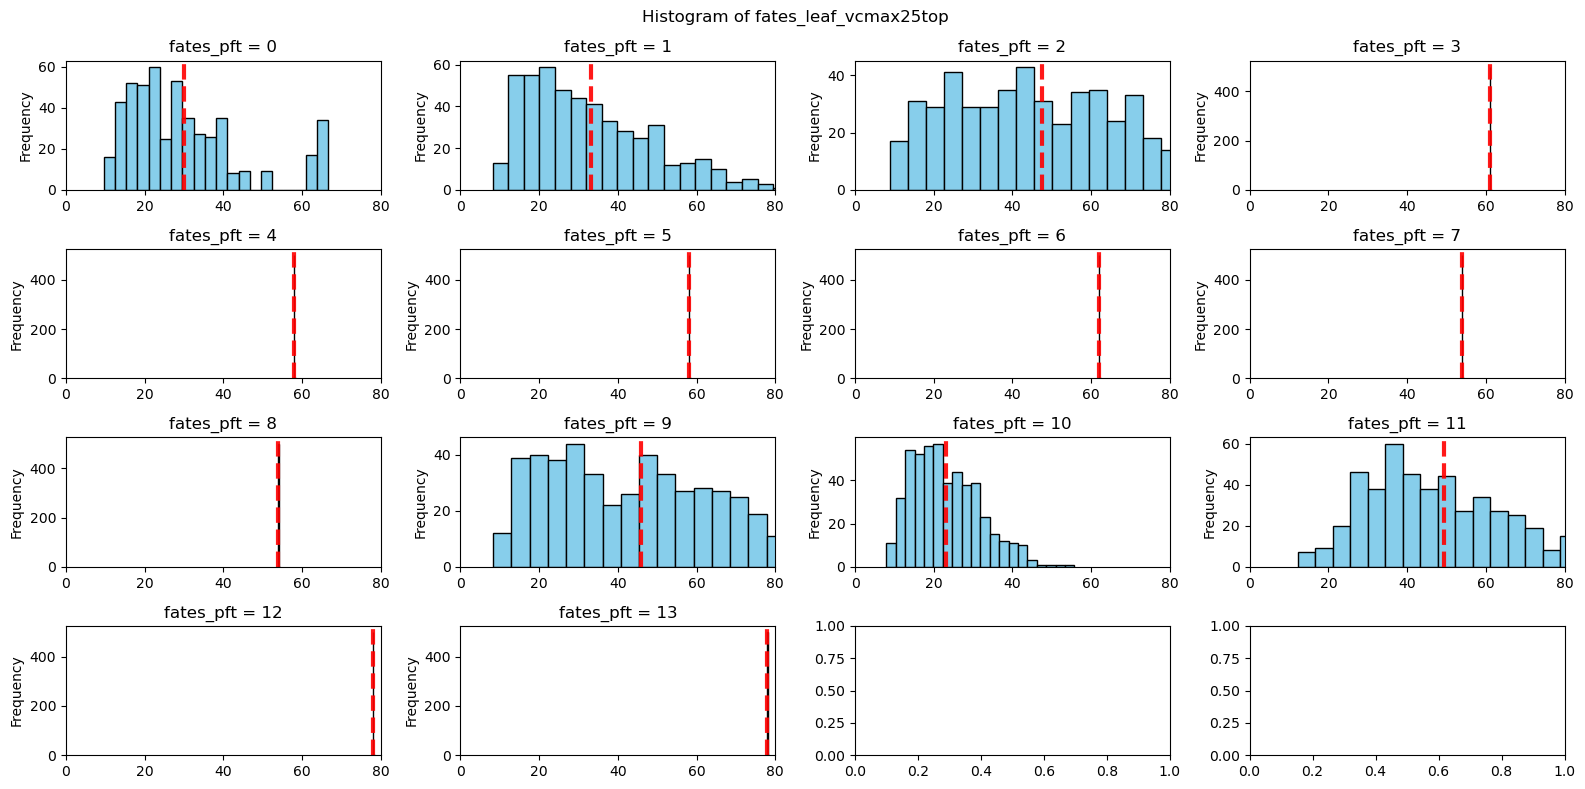

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 8))
# Loop through each unique value of fates_pft
plot_distribution_per_pft('fates_leaf_vcmax25top',0,80,fig)


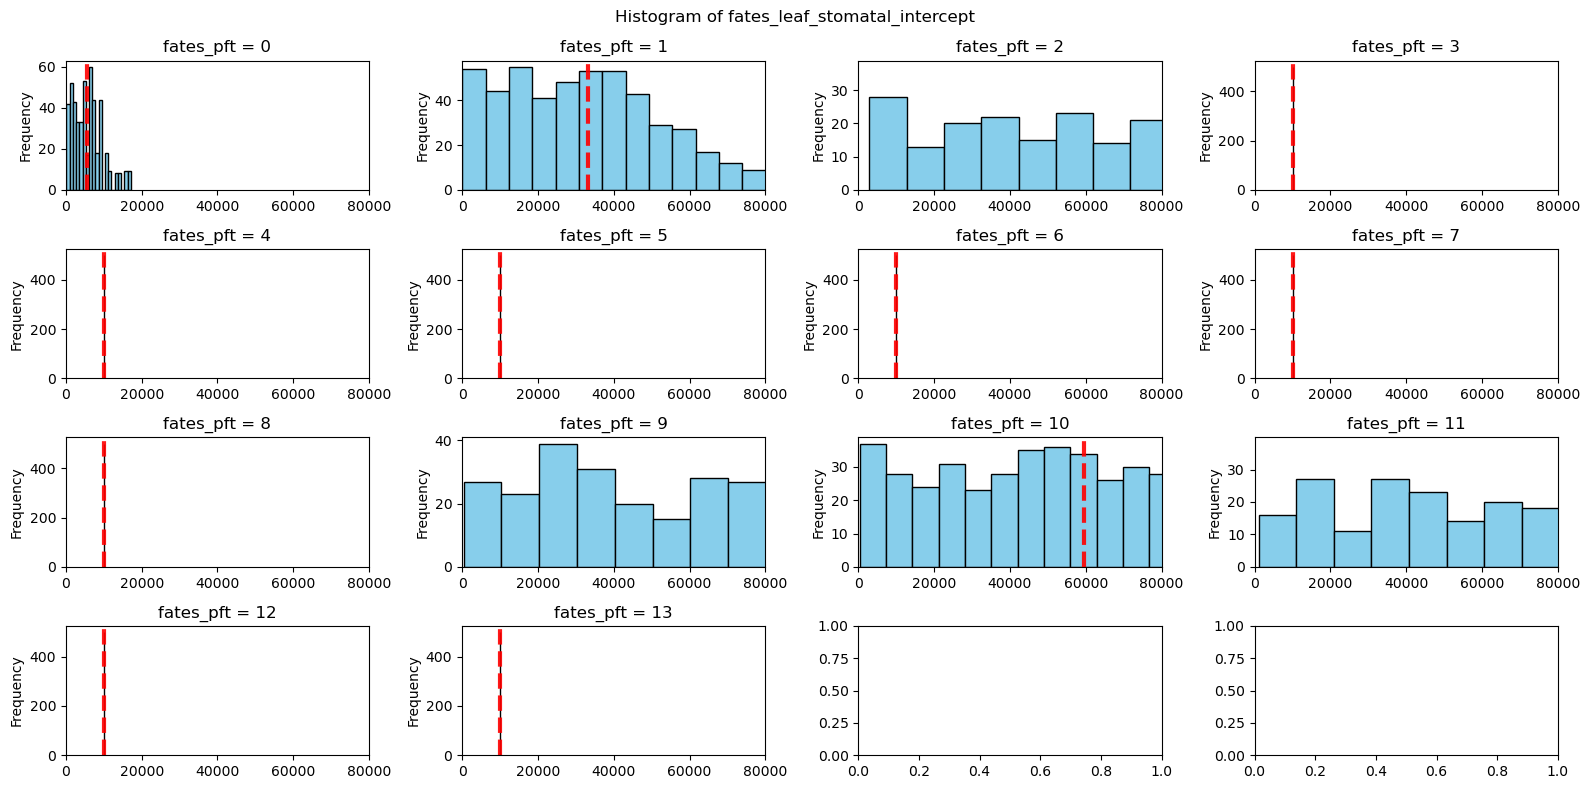

In [17]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 8))
plot_distribution_per_pft('fates_leaf_stomatal_intercept',0,80000,fig)

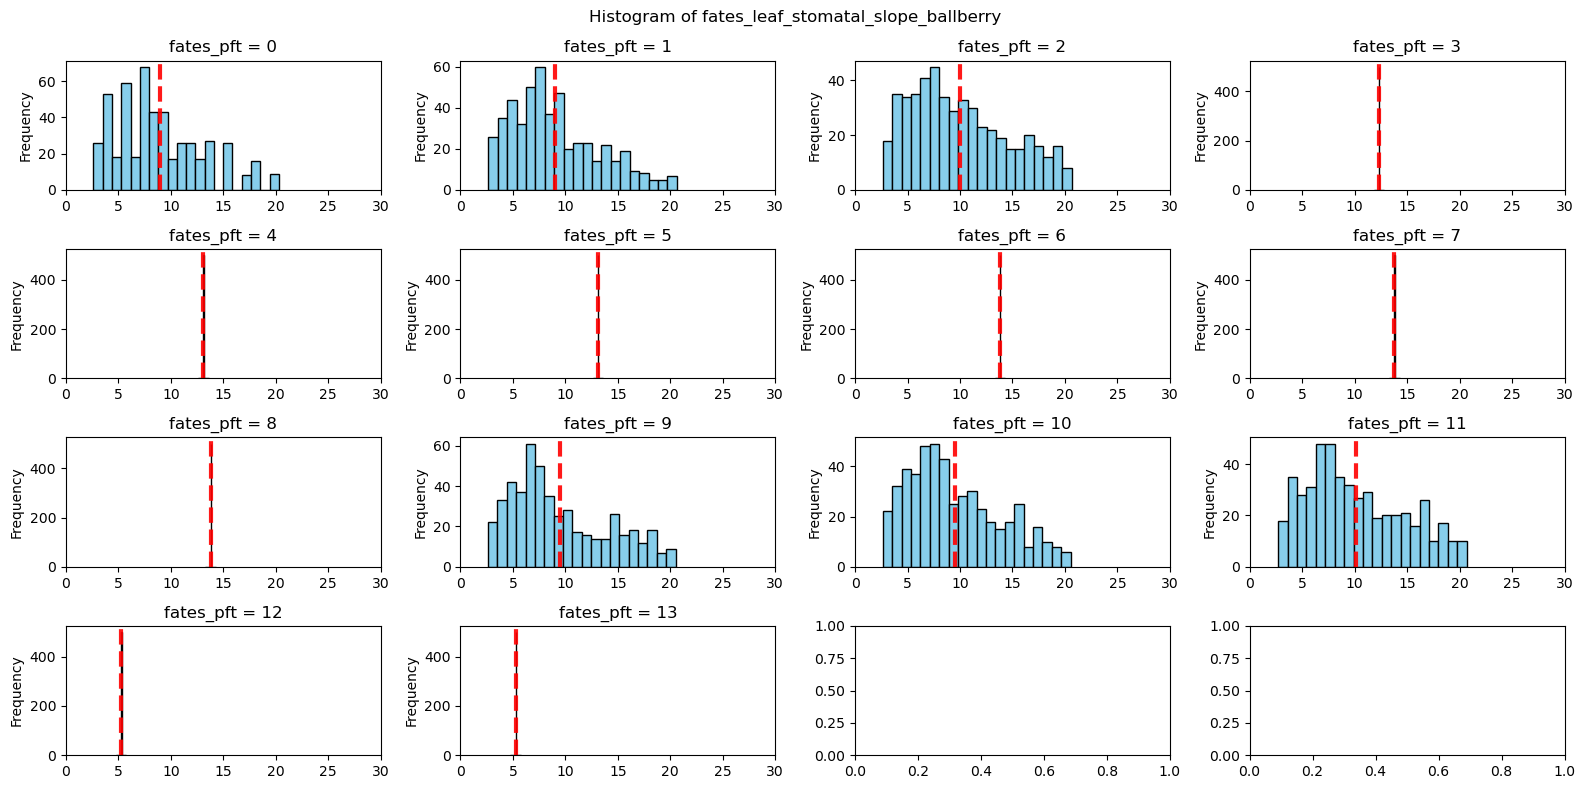

In [18]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 8))
plot_distribution_per_pft('fates_leaf_stomatal_slope_ballberry',0,30,fig)

In [19]:
SPparams=['fates_leaf_vcmaxse', 
'fates_leaf_jmaxse',
'fates_leaf_vcmaxha', 
'fates_leaf_vcmaxhd',
'fates_leaf_stomatal_intercept',
'fates_leaf_vcmax25top',
'fates_maintresp_leaf_atkin2017_baserate',
'fates_leaf_stomatal_slope_ballberry',
'fates_nonhydro_smpsc']